In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

diabetes_df = pd.read_csv("../WEEK13/diabetes.csv")

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

#logistic regression
clr = LogisticRegression(random_state=42).fit(X_train_sc,y_train)

#predict
y_predicted = clr.predict(X_test_sc)
# print(y_predicted)

print(clr.score(X_test_sc,y_test))

0.7359307359307359


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


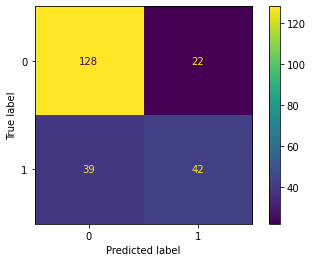

In [3]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clr, X_test_sc, y_test)

### Truncated SVD

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [5]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 6)
X_train_SVD = svd.fit_transform(X_train)
X_test_SVD  =svd.fit_transform(X_test)

clr = LogisticRegression(random_state = 42)
clr.fit(X_train_SVD, y_train)

clr.score(X_test_SVD, y_test)

0.70995670995671

In [ ]:
plot_confusion_matrix(clr, X_test_SVD, y_test)